In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
raw_data = pd.read_csv('LoanStats3d.csv')

C:\Users\johna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
raw_data.head()

# remove percent signs from int_rate, revol_util -> convert to float
# change term to int value?
# potentially split issue_d, earliest_cr_line, last_payment_d, next_payment_d, last_credit_pull_d into 2 columns (month, day)
# remove url, zip_code, id, member_id

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139,16000,16000,16000.0,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,48000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,297xx,SC,33.18,0,Jun-91,0,33.0,2.0,11,2,19108,29.60%,19,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-17,379.39,Jan-17,Jan-17,0,33.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,31329,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700,0.0,0.0,1.0,6,2848,263953.0,17.6,0,0,131.0,294,11,6,2,11.0,76.0,11.0,76.0,2,6,9,6,8,6,9,11.0,9,11,0.0,0,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,68354783,73244544,9600,9600,9600.0,36 months,7.49%,298.58,A,A4,tech,8 years,MORTGAGE,60000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,299xx,SC,22.44,0,Jun-96,0,NaN,NaN,7,0,7722,59.40%,9,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-17,298.58,Jan-17,Jan-17,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,55387,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000,0.0,0.0,2.0,2,7912,4778.0,61.8,0,0,234.0,91,9,9,0,11.0,NaN,9.0,NaN,0,3,3,3,3,5,4,4.0,3,7,0.0,0,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,68466916,73356753,25000,25000,25000.0,36 months,7.49%,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,109000.0,Not Verified,Dec-15,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,226xx,VA,26.02,0,Dec-01,1,NaN,NaN,9,0,20862,54.30%,19,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-16,20807.39,NaN,Jan-17,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,305781,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400,1.0,0.0,1.0,2,33976,17538.0,54.3,0,0,142.0,168,13,13,3,13.0,NaN,0.0,NaN,0,3,3,5,6,7,5,9.0,3,9,0.0,0,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,68466961,73356799,28000,28000,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0,May-84,0,42.0,NaN,16,0,51507,64.50%,24,w,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,0.0,0.0,Jan-17,858.05,Jan-17,Jan-17,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,221110,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900,0.0,1.0,0.0,1,13819,16623.0,59.9,0,0,82.0,379,19,19,2,19.0,48.0,NaN,42.0,0,7,9,9,11,4,

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(44), int64(42), object(25)
memory usage: 356.6+ MB


In [7]:
raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.393097e+07,5.759576e+07,15240.285862,15240.285862,15234.156412,441.860087,7.696561e+04,19.195989,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,7221.518316,7218.407431,9272.455831,9268.964681,7098.480969,2119.537282,0.548363,53.889215,9.443726,2641.275728,0.020240,45.114741,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,9.475423e+06,1.013358e+07,8571.325901,8571.325901,8567.935752,244.851179,7.394996e+04,23.504038,0.927695,0.867776,21.990270,25.577899,5.633119,0.649778,2.419503e+04,12.097200,7141.923707,7138.509490,6978.424974,6976.070122,6376.095419,1829.734285,5.195140,426.621430,74.459400,5642.581267,0.157506,22.537808,0.0,52730.379847,7.169233,0.086482,2240.648162,1.552696e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.021964,1.520129,2.631886,5284.701239,20.013842,3.766404e+04,1.446872,2.723339,2.480242,3.19538,15671.803897,14774.166134,27.576378,0.117019,781.821107,52.075471,95.374931,17.156985,9.189312,1.990160,32.272793,23.0038

In [8]:
df = raw_data.copy()

In [9]:
# useless columns
df.drop(['id', 'member_id', 
         'zip_code', 'url', 
         'emp_title',
        'desc', 'addr_state',
        'out_prncp_inv', 'total_pymnt_inv',
        'policy_code', 'application_type'], axis=1, inplace=True)

In [10]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,16000,16000,16000.0,60 months,14.85%,379.39,C,C5,10+ years,MORTGAGE,48000.0,Not Verified,Dec-15,Current,n,credit_card,Credit card refinancing,33.18,0,Jun-91,0,33.0,2.0,11,2,19108,29.60%,19,w,13668.88,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-17,379.39,Jan-17,Jan-17,0,33.0,NaN,NaN,NaN,0,0,31329,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700,0.0,0.0,1.0,6,2848,263953.0,17.6,0,0,131.0,294,11,6,2,11.0,76.0,11.0,76.0,2,6,9,6,8,6,9,11.0,9,11,0.0,0,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,9600,9600,9600.0,36 months,7.49%,298.58,A,A4,8 years,MORTGAGE,60000.0,Not Verified,Dec-15,Current,n,credit_card,Credit card refinancing,22.44,0,Jun-96,0,NaN,NaN,7,0,7722,59.40%,9,w,6635.69,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-17,298.58,Jan-17,Jan-17,0,NaN,NaN,NaN,NaN,0,0,55387,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000,0.0,0.0,2.0,2,7912,4778.0,61.8,0,0,234.0,91,9,9,0,11.0,NaN,9.0,NaN,0,3,3,3,3,5,4,4.0,3,7,0.0,0,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,25000,25000,25000.0,36 months,7.49%,777.55,A,A4,10+ years,MORTGAGE,109000.0,Not Verified,Dec-15,Fully Paid,n,debt_consolidation,Debt consolidation,26.02,0,Dec-01,1,NaN,NaN,9,0,20862,54.30%,19,w,0.00,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-16,20807.39,NaN,Jan-17,0,NaN,NaN,NaN,NaN,0,0,305781,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400,1.0,0.0,1.0,2,33976,17538.0,54.3,0,0,142.0,168,13,13,3,13.0,NaN,0.0,NaN,0,3,3,5,6,7,5,9.0,3,9,0.0,0,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,28000,28000,28000.0,36 months,6.49%,858.05,A,A2,10+ years,MORTGAGE,92000.0,Not Verified,Dec-15,Current,n,debt_consolidation,Debt consolidation,21.60,0,May-84,0,42.0,NaN,16,0,51507,64.50%,24,w,19263.77,10271.36,8736.23,1535.13,0.0,0.0,0.0,Jan-17,858.05,Jan-17,Jan-17,0,NaN,NaN,NaN,NaN,0,0,221110,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900,0.0,1.0,0.0,1,13819,16623.0,59.9,0,0,82.0,379,19,19,2,19.0,48.0,NaN,42.0,0,7,9,9,11,4,13,18.0,9,16,0.0,0,0,0,91.7,22.2,0,0,304003,74920,41500,42503
4,8650,8650,8650.0,36 months,19.89%,320.99,E,E3,8 years,RENT,55000.0,Verified,Dec-15,Fully Paid,n,debt_consolidation,Debt consolidation,25.49,0,Mar-05,4,NaN,30.0,18,1,9568,46%,19,w,0.00,9190.49,8650.00,540.49,0.0,0.0,0.0,May-16,8251.42,NaN,Jun-16,0,NaN,NaN,NaN,NaN,0,0,18926,6.0,1.0,0.0,1.0,19.0,9358.0,51.0,12.0,16.0,653.0,46.0,20750,2.0,0.0,5.0,17,1051,1375.0,45.0,0,0,129.0,95,0,0,0,8.0,NaN,0.0,NaN,0,2,17,2,2,2,17,17.0,13,18,NaN,0,0,12,100.0,50.0,1,0,38998,18926,2750,18248


## Data Cleaning

In [11]:
# remove percent signs and convert to float
for column in ['int_rate', 'revol_util']:
    df[column] = df[column].str.replace('%', '').astype('f')

In [12]:
df['term'] = df['term'].str.replace(' months', '').astype('i')

## Exploratory Analysis

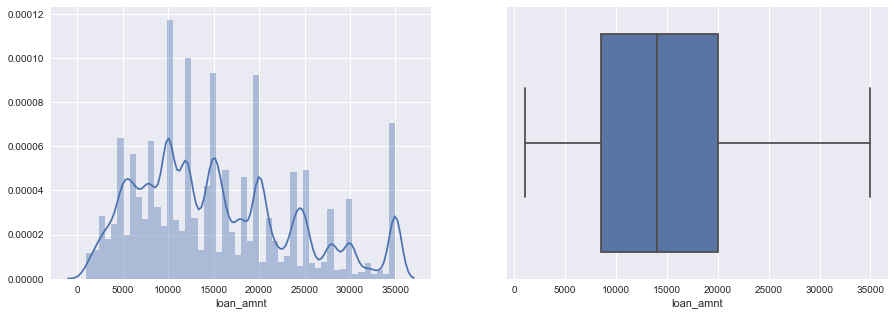

In [13]:
# loan amount

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['loan_amnt'])

plt.subplot(1, 2, 2)
sns.boxplot(df['loan_amnt'])

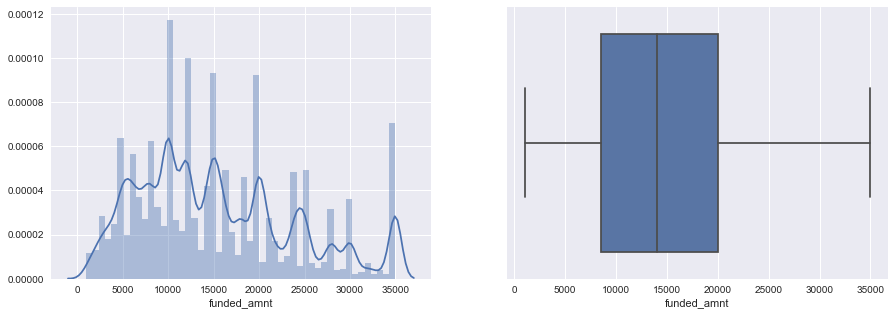

In [14]:
# funded amount

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['funded_amnt'])

plt.subplot(1, 2, 2)
sns.boxplot(df['funded_amnt'])

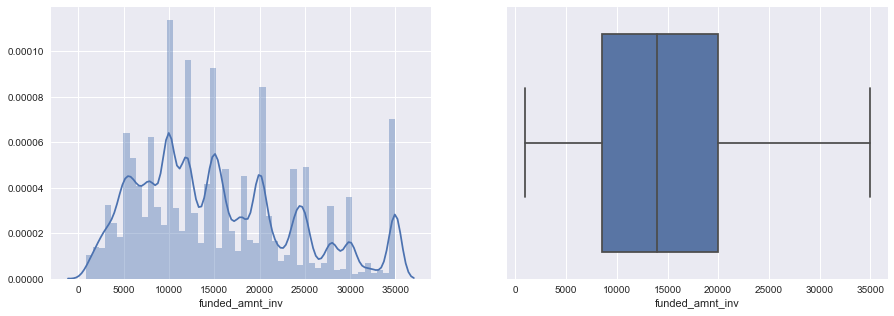

In [15]:
# funded amount inv

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['funded_amnt_inv'])

plt.subplot(1, 2, 2)
sns.boxplot(df['funded_amnt_inv'])

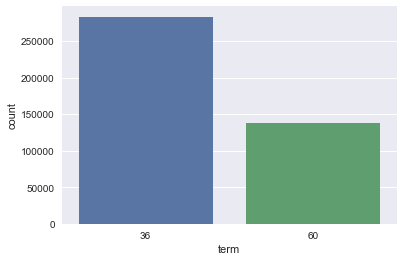

In [16]:
sns.countplot(df['term'])

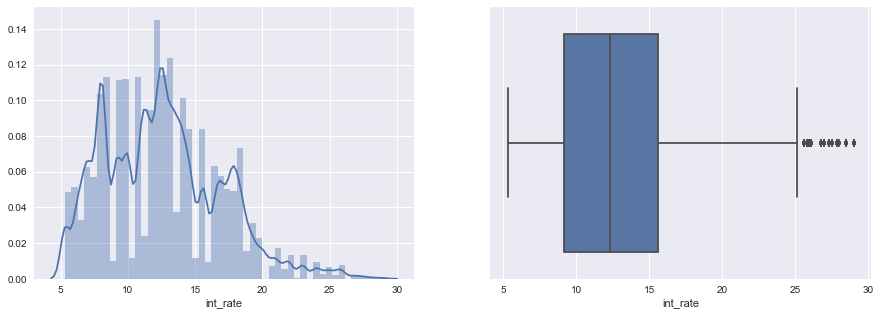

In [17]:
# interest rate

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['int_rate'])

plt.subplot(1, 2, 2)
sns.boxplot(df['int_rate'])

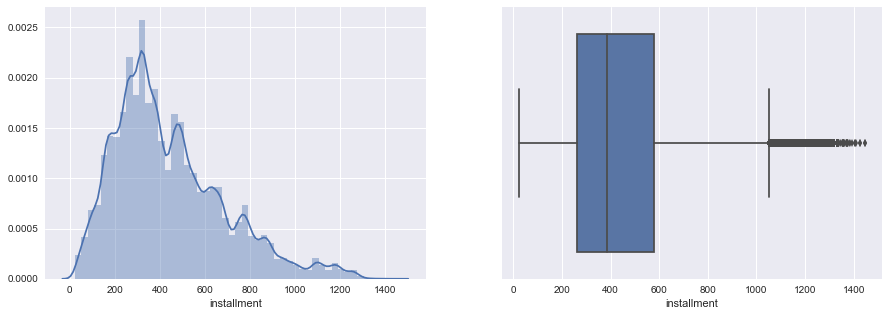

In [18]:
# installment

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['installment'])

plt.subplot(1, 2, 2)
sns.boxplot(df['installment'])

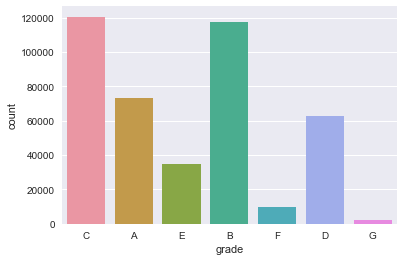

In [19]:
sns.countplot(df['grade'])

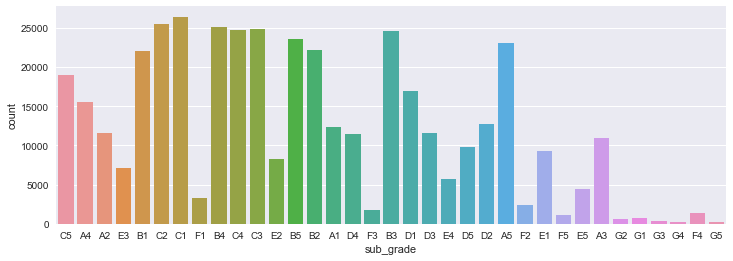

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(df['sub_grade'])

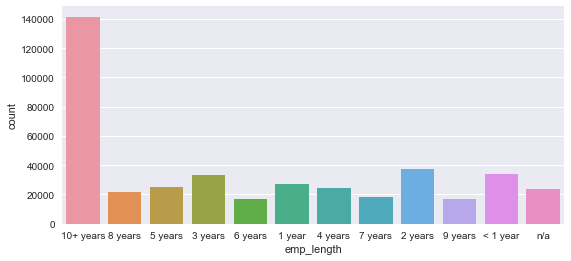

In [21]:
plt.figure(figsize=(9,4))
sns.countplot(df['emp_length'])

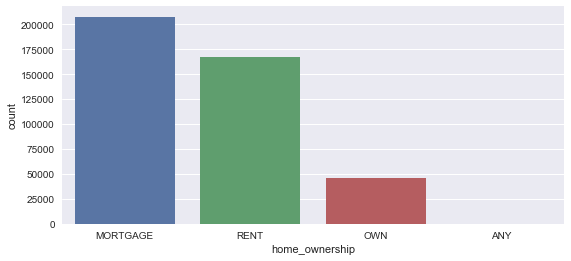

In [22]:
plt.figure(figsize=(9,4))
sns.countplot(df['home_ownership'])

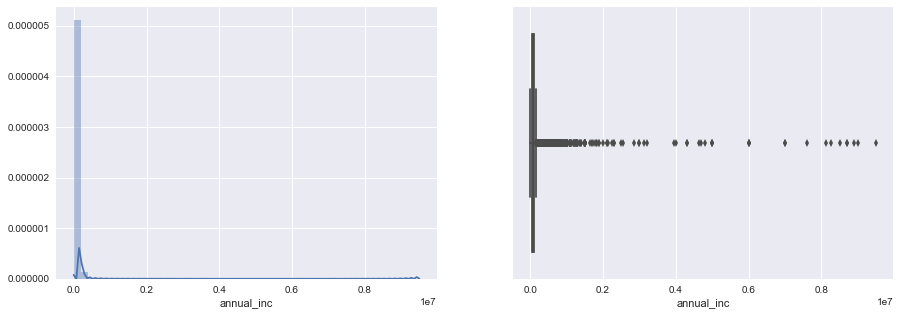

In [23]:
# annual income

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['annual_inc'])

plt.subplot(1, 2, 2)
sns.boxplot(df['annual_inc'])

In [24]:
df['annual_inc'].sort_values(ascending=False)[:10]

230964    9500000.0
40524     9000000.0
217710    8900060.0
400628    8706582.0
24653     8700000.0
48074     8500021.0
85713     8253000.0
128421    8121180.0
132773    7600000.0
315210    7000000.0
Name: annual_inc, dtype: float64

In [25]:
df['annual_inc'].sort_values()[:10]

65651        0.0
18190        0.0
73910     1200.0
8736      1770.0
317094    3000.0
420229    3600.0
9791      3800.0
274900    4000.0
389612    4524.0
360859    5000.0
Name: annual_inc, dtype: float64

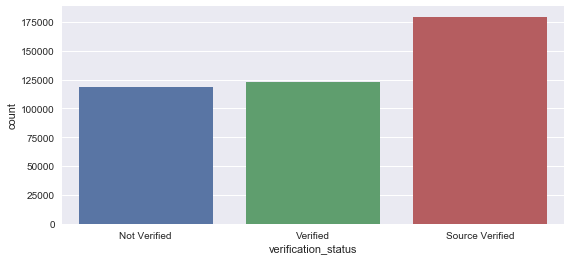

In [26]:
plt.figure(figsize=(9,4))
sns.countplot(df['verification_status'])

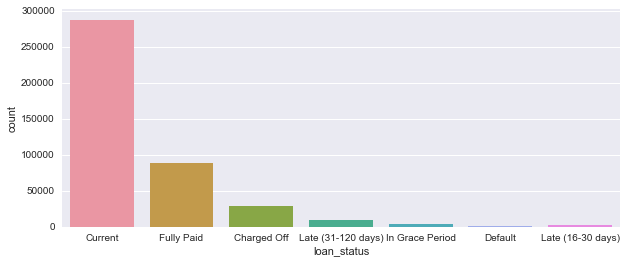

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(df['loan_status'])

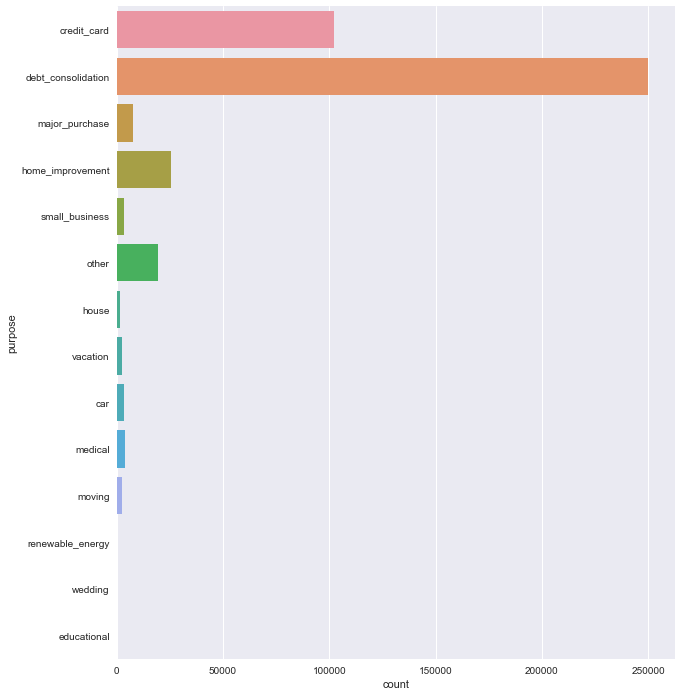

In [28]:
plt.figure(figsize=(10,12))
sns.countplot(y=df['purpose'], orient='h')

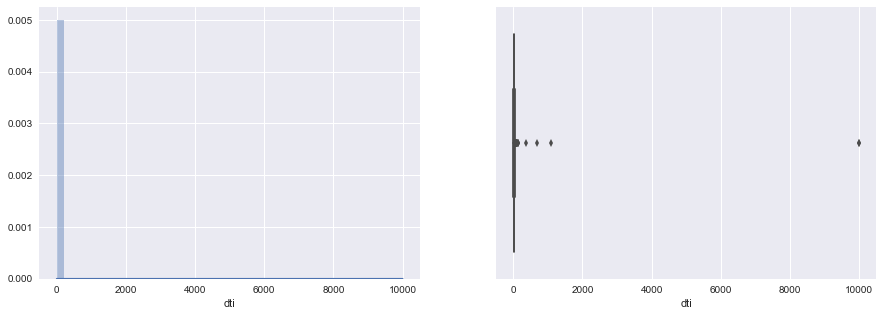

In [29]:
# debt-to-income

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['dti'])

plt.subplot(1, 2, 2)
sns.boxplot(df['dti'])

In [30]:
df['dti'].mean()

19.195989076099718

In [31]:
df['dti'].sort_values(ascending=False)[:5]

65651    9999.00
18190    9999.00
8736     1092.52
73910     672.52
66463     380.53
Name: dti, dtype: float64

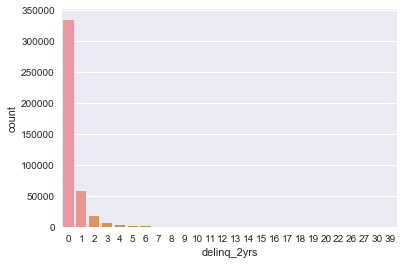

In [32]:
sns.countplot(df['delinq_2yrs'])

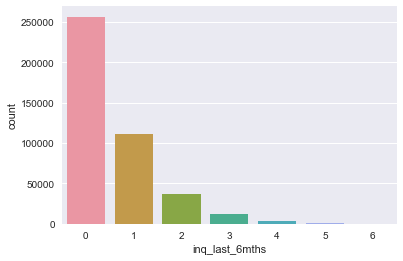

In [33]:
sns.countplot(df['inq_last_6mths'])

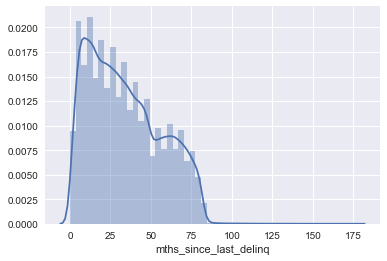

In [34]:
sns.distplot(df['mths_since_last_delinq'].dropna())

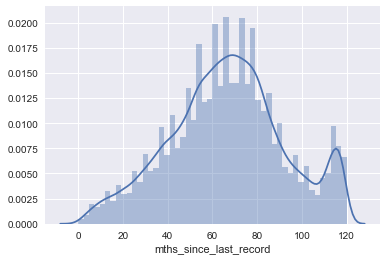

In [35]:
sns.distplot(df['mths_since_last_record'].dropna())

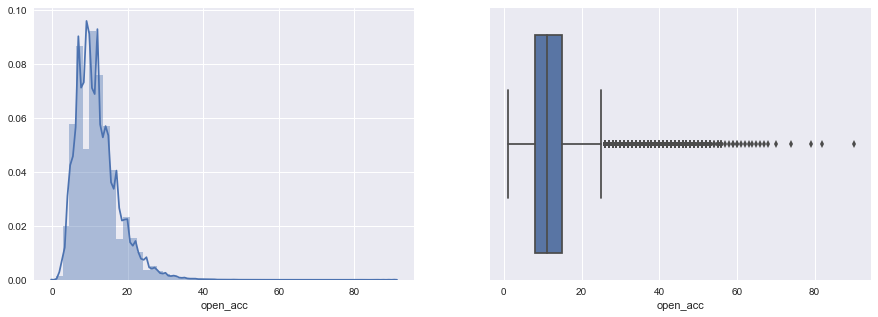

In [36]:
# open accounts

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['open_acc'])

plt.subplot(1, 2, 2)
sns.boxplot(df['open_acc'])

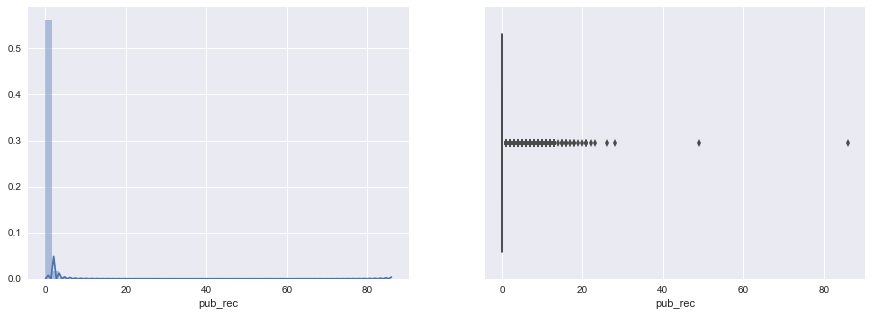

In [37]:
# public records?

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['pub_rec'])

plt.subplot(1, 2, 2)
sns.boxplot(df['pub_rec'])

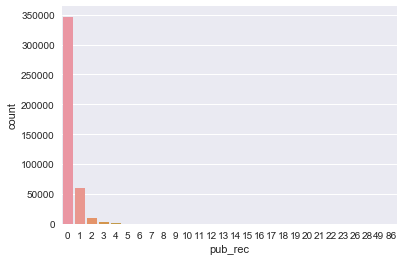

In [38]:
sns.countplot(df['pub_rec'])

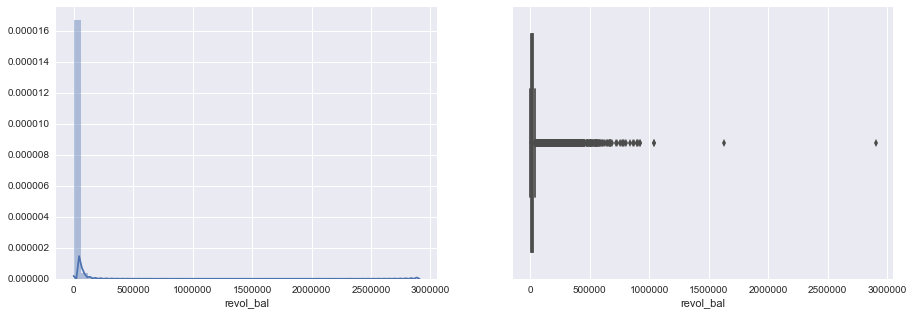

In [39]:
# balance?

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['revol_bal'])

plt.subplot(1, 2, 2)
sns.boxplot(df['revol_bal'])

In [40]:
df['revol_bal'].sort_values(ascending=False)[:5]

289351    2904836
162613    1630818
367207    1043860
222107    1039903
156835     924579
Name: revol_bal, dtype: int64

In [41]:
df['revol_bal'].sort_values()[:5]

328907    0
267798    0
281503    0
187122    0
253552    0
Name: revol_bal, dtype: int64

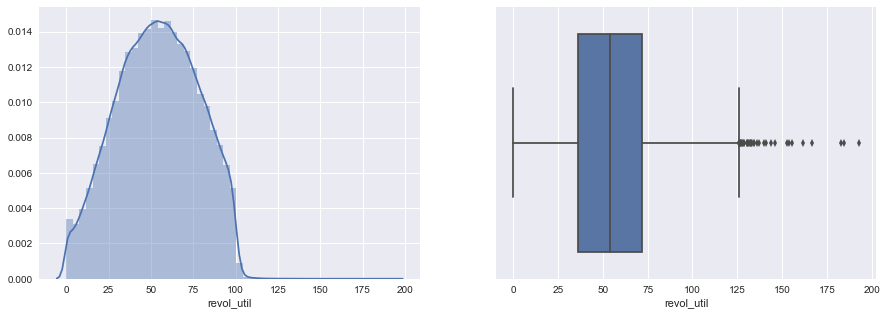

In [42]:
# utilities

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['revol_util'].dropna())

plt.subplot(1, 2, 2)
sns.boxplot(df['revol_util'])

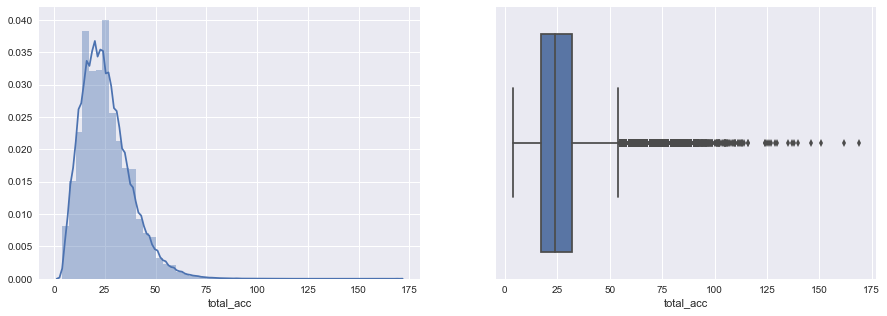

In [43]:
# total accounts

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_acc'].dropna())

plt.subplot(1, 2, 2)
sns.boxplot(df['total_acc'])

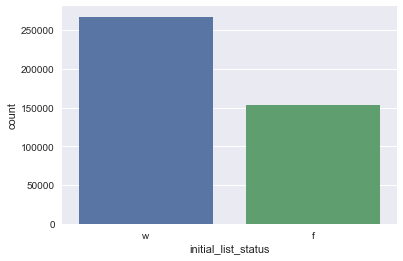

In [44]:
sns.countplot(df['initial_list_status'])

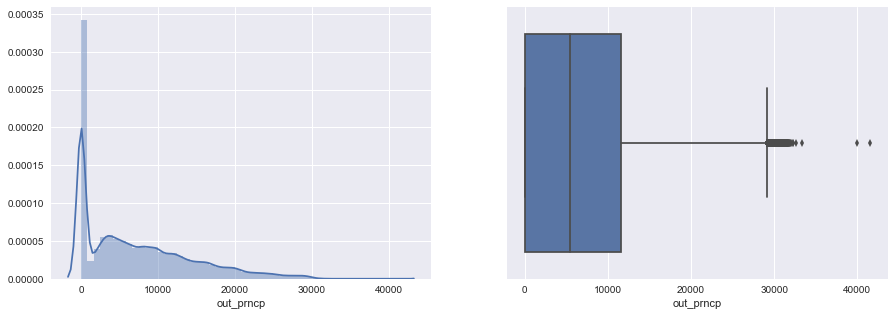

In [45]:
# out principle?

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['out_prncp'])

plt.subplot(1, 2, 2)
sns.boxplot(df['out_prncp'])

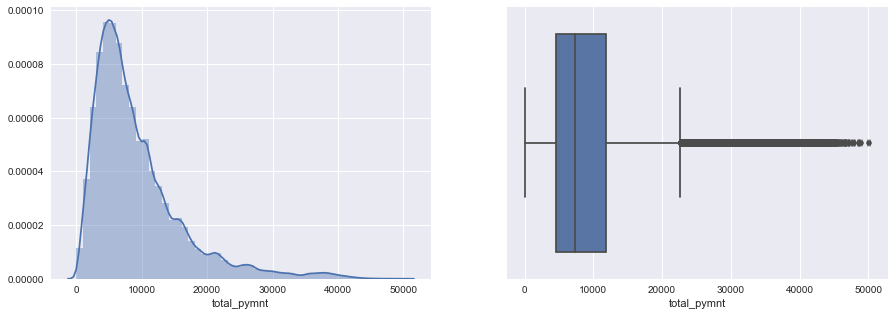

In [47]:
# total payment

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_pymnt'])

plt.subplot(1, 2, 2)
sns.boxplot(df['total_pymnt'])

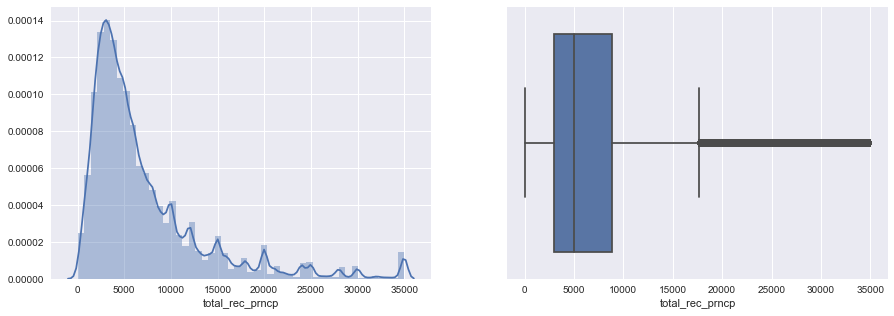

In [48]:
# total recovered principle

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_rec_prncp'])

plt.subplot(1, 2, 2)
sns.boxplot(df['total_rec_prncp'])

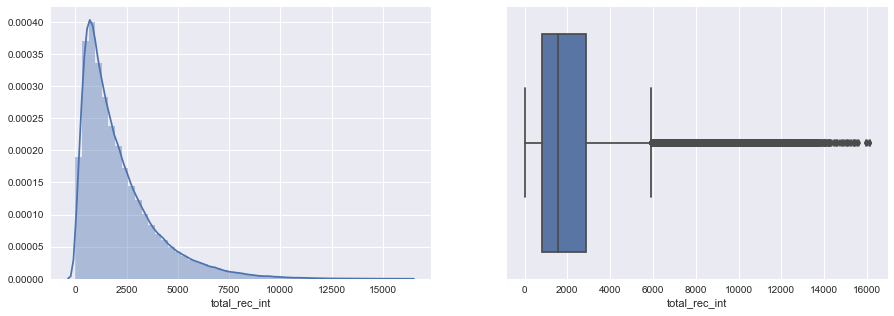

In [49]:
# total recovered interest

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_rec_int'])

plt.subplot(1, 2, 2)
sns.boxplot(df['total_rec_int'])

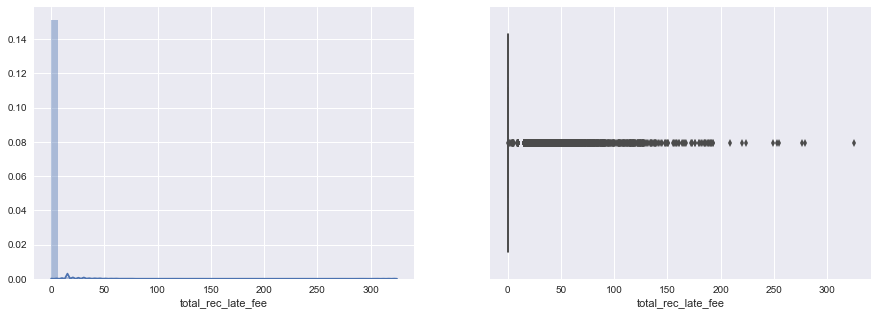

In [50]:
# total recovered late fee

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_rec_late_fee'])

plt.subplot(1, 2, 2)
sns.boxplot(df['total_rec_late_fee'])

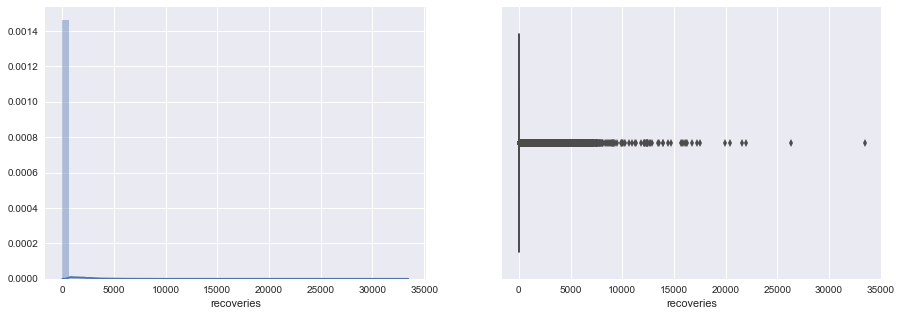

In [51]:
# recoveries

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['recoveries'])

plt.subplot(1, 2, 2)
sns.boxplot(df['recoveries'])

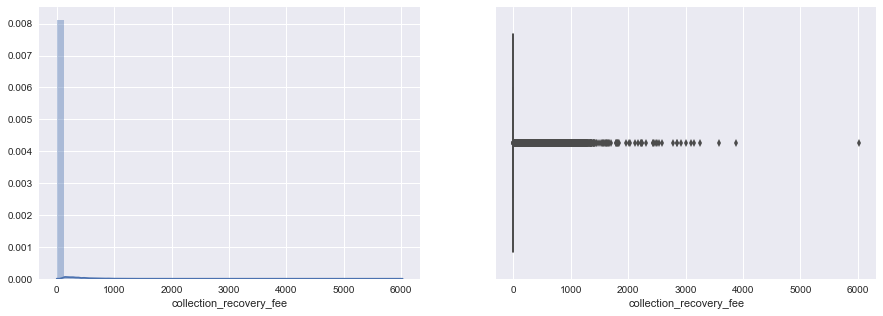

In [52]:
# collection recovery fee

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['collection_recovery_fee'])

plt.subplot(1, 2, 2)
sns.boxplot(df['collection_recovery_fee'])

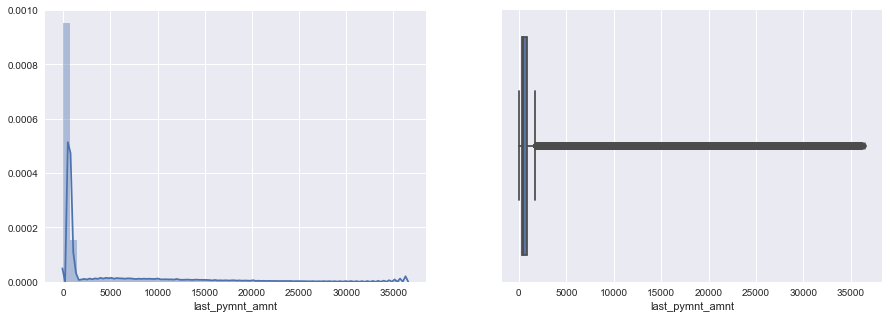

In [53]:
# last payment amount

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['last_pymnt_amnt'])

plt.subplot(1, 2, 2)
sns.boxplot(df['last_pymnt_amnt'])

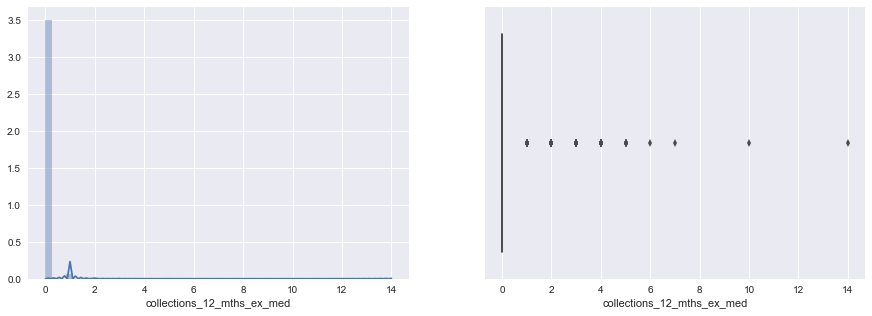

In [54]:
# collections_12_mths_ex_med

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['collections_12_mths_ex_med'])

plt.subplot(1, 2, 2)
sns.boxplot(df['collections_12_mths_ex_med'])

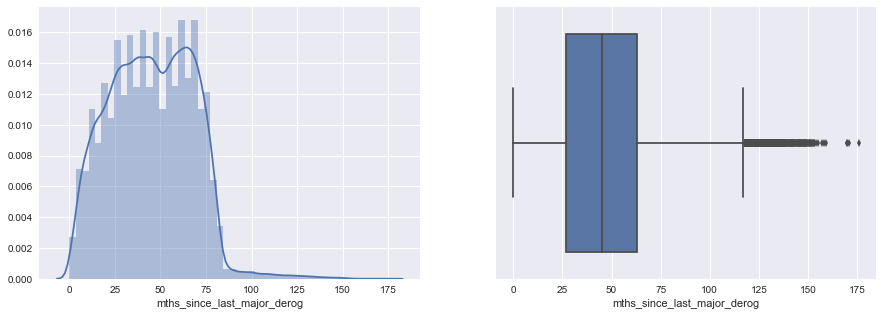

In [55]:
# collections_12_mths_ex_med

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['mths_since_last_major_derog'].dropna())

plt.subplot(1, 2, 2)
sns.boxplot(df['mths_since_last_major_derog'].dropna())

In [56]:
def make_plots(col):
    # collections_12_mths_ex_med

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(df[col].dropna())

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    
    
def countplot(col):
    sns.countplot(df[col])

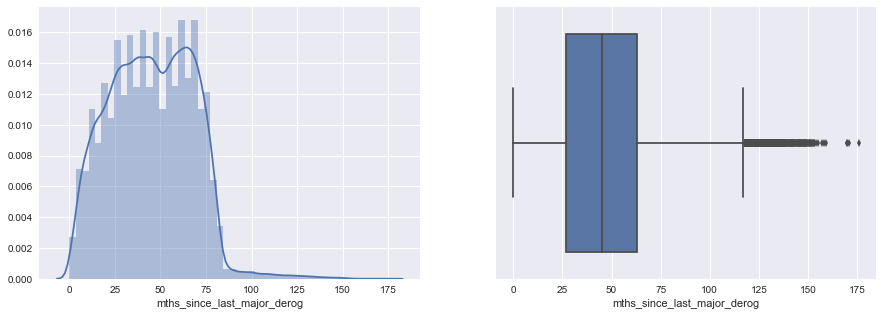

In [57]:
make_plots('mths_since_last_major_derog')

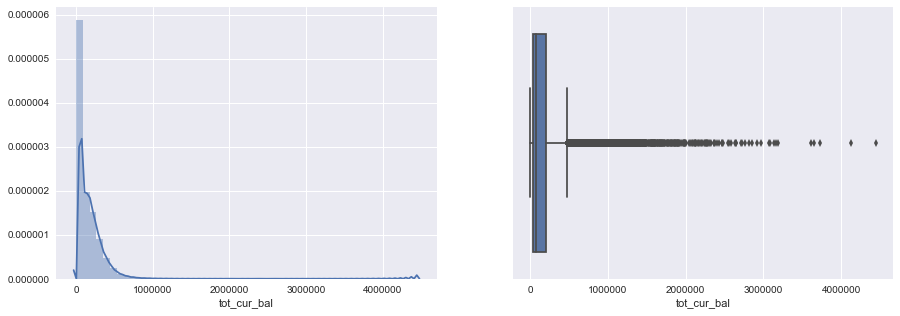

In [59]:
make_plots('tot_cur_bal')

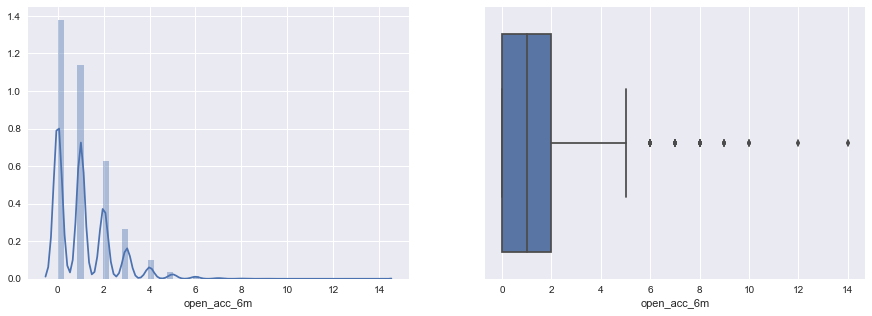

In [60]:
make_plots('open_acc_6m')

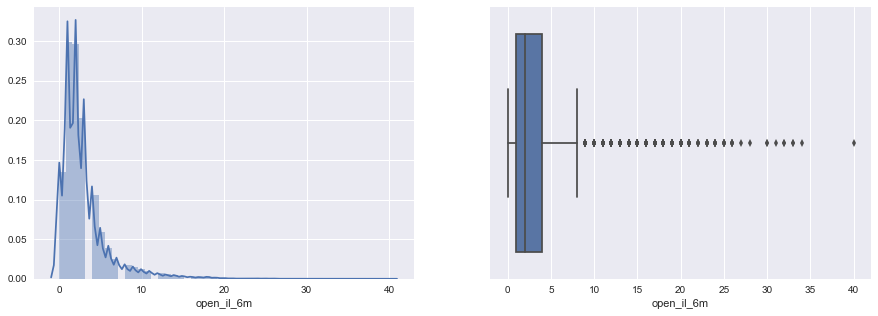

In [61]:
make_plots('open_il_6m')

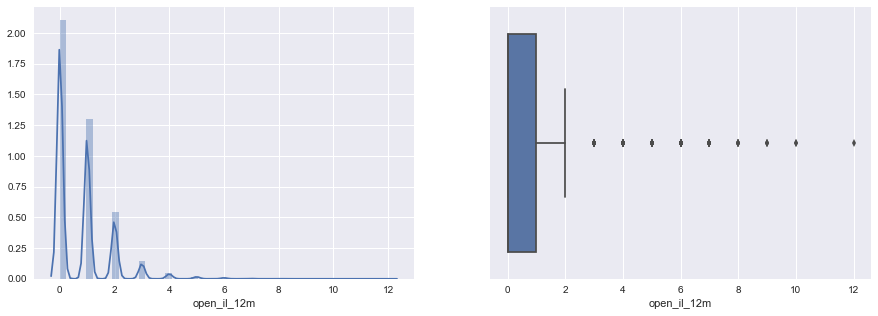

In [62]:
make_plots('open_il_12m')

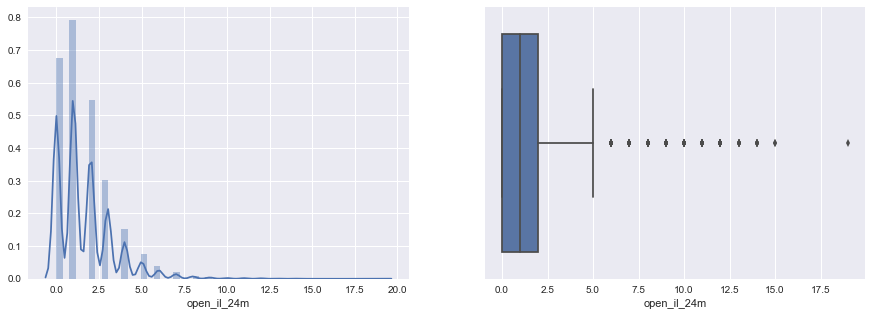

In [63]:
make_plots('open_il_24m')

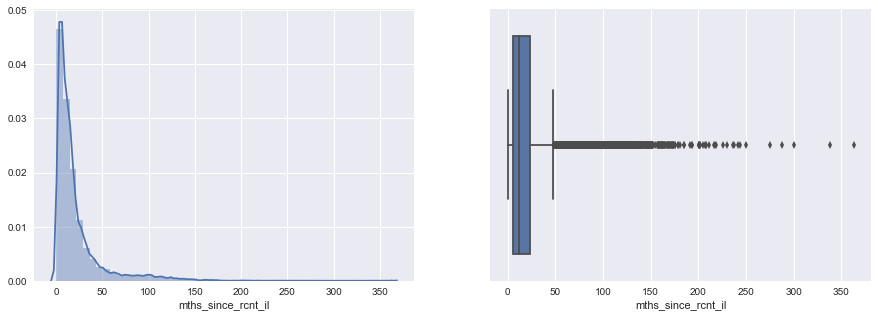

In [64]:
make_plots('mths_since_rcnt_il')

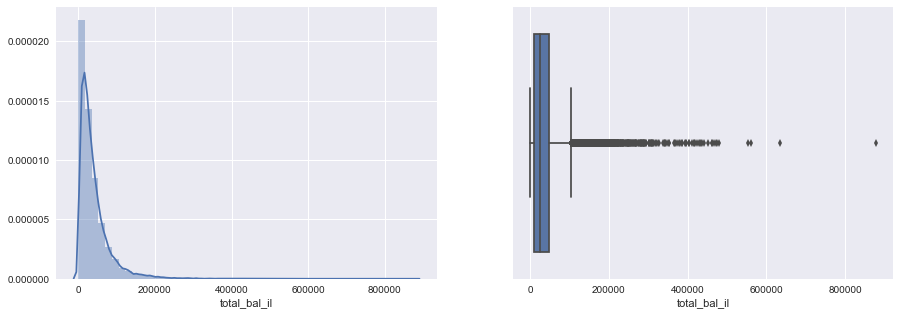

In [65]:
make_plots('total_bal_il')

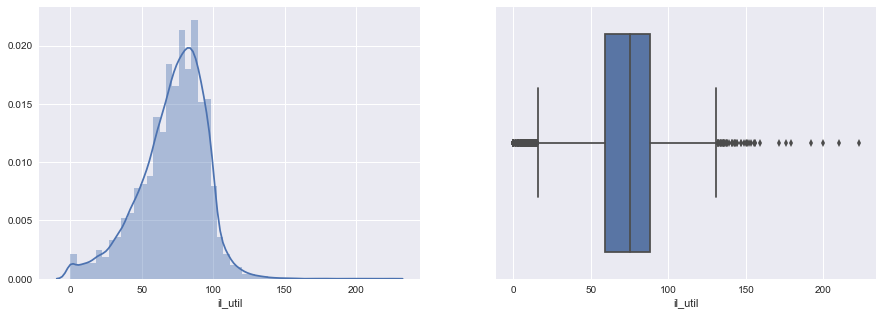

In [66]:
make_plots('il_util')

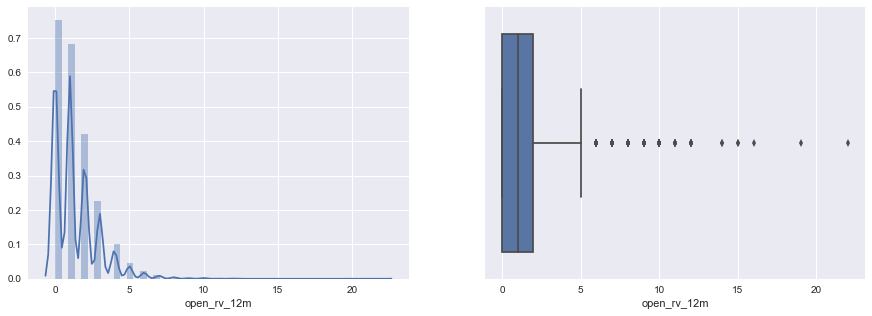

In [67]:
make_plots('open_rv_12m')

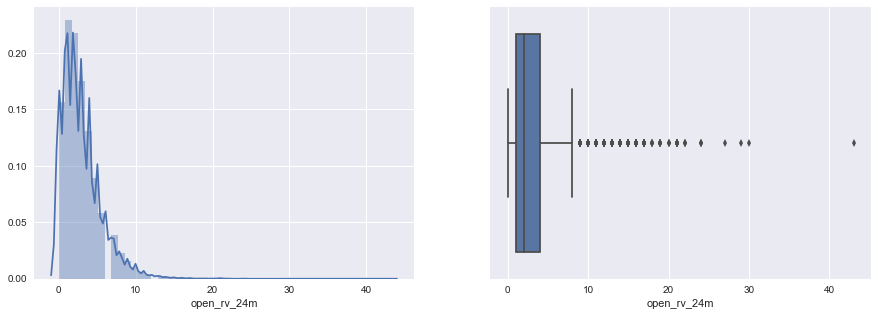

In [68]:
make_plots('open_rv_24m')

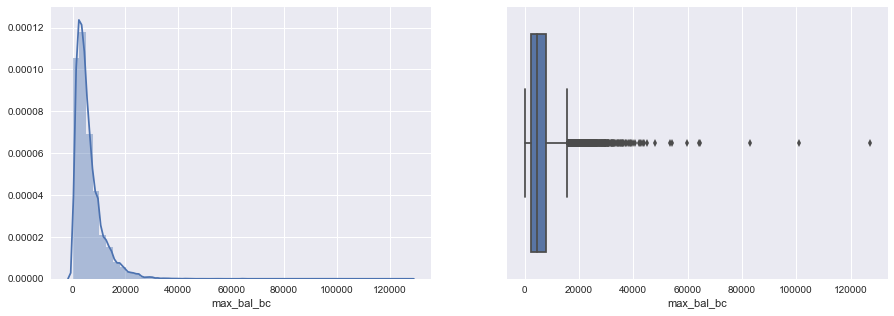

In [69]:
make_plots('max_bal_bc')

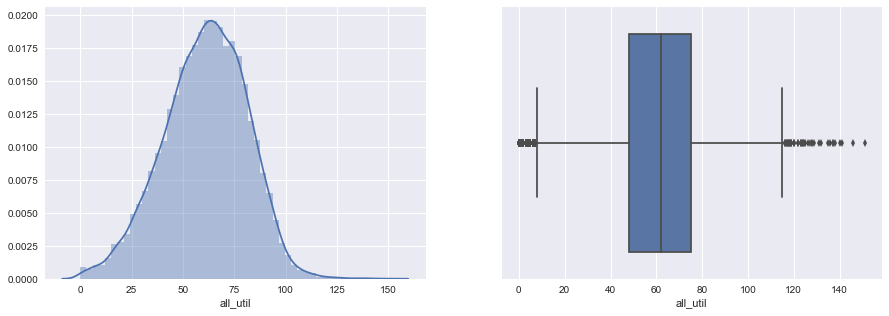

In [70]:
make_plots('all_util')

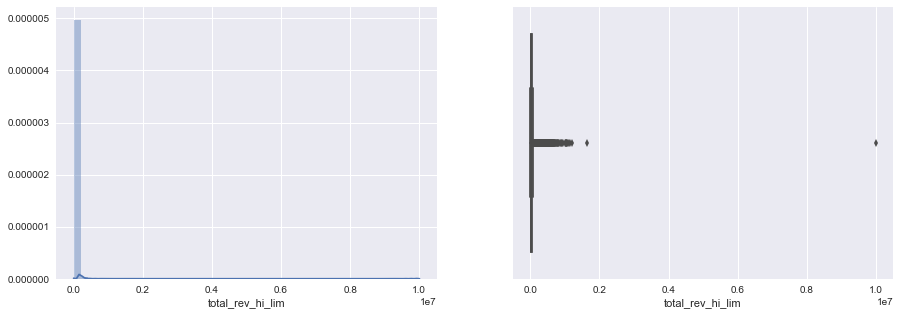

In [71]:
make_plots('total_rev_hi_lim')

In [72]:
df['total_rev_hi_lim'].sort_values(ascending=False)[:5]

289351    9999999
162613    1641300
234770    1200500
156835    1165700
419599    1119200
Name: total_rev_hi_lim, dtype: int64

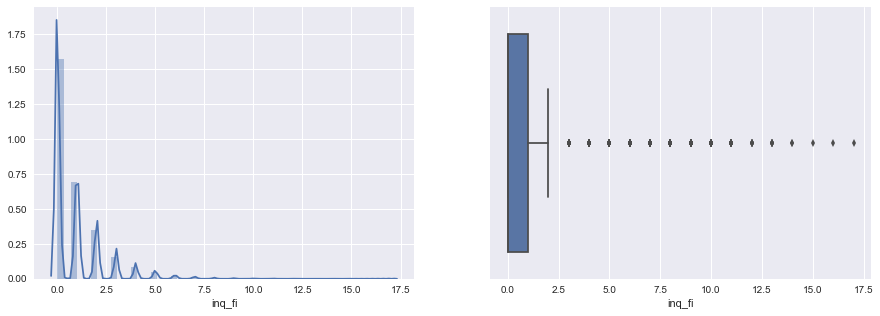

In [73]:
make_plots('inq_fi')

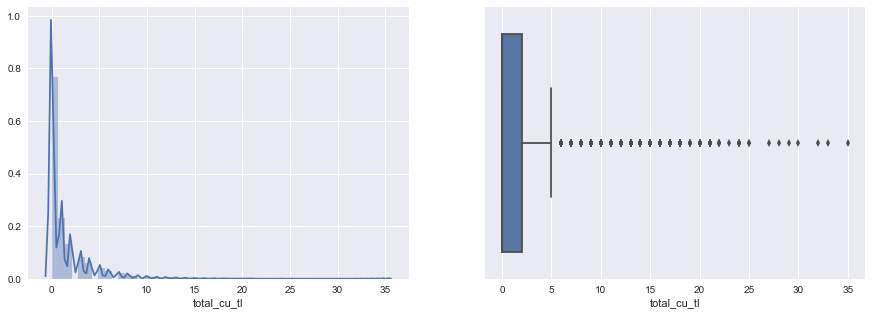

In [74]:
make_plots('total_cu_tl')

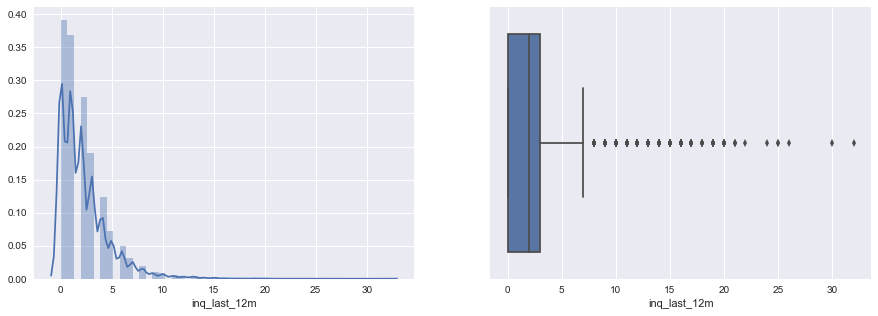

In [75]:
make_plots('inq_last_12m')

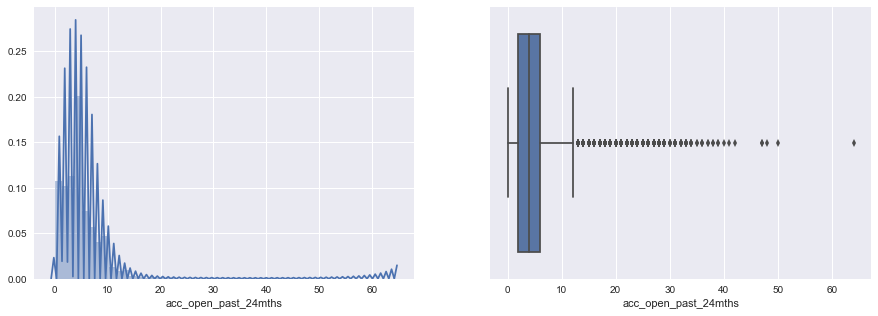

In [76]:
make_plots('acc_open_past_24mths')

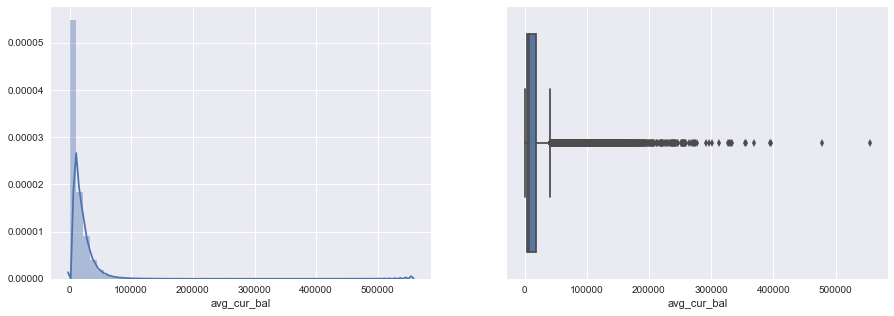

In [77]:
make_plots('avg_cur_bal')

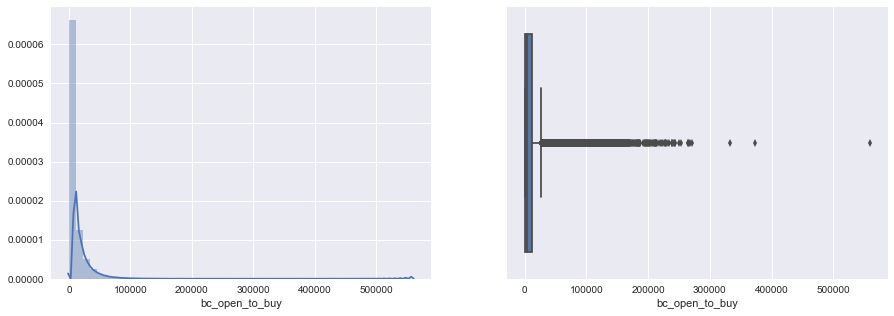

In [78]:
make_plots('bc_open_to_buy')

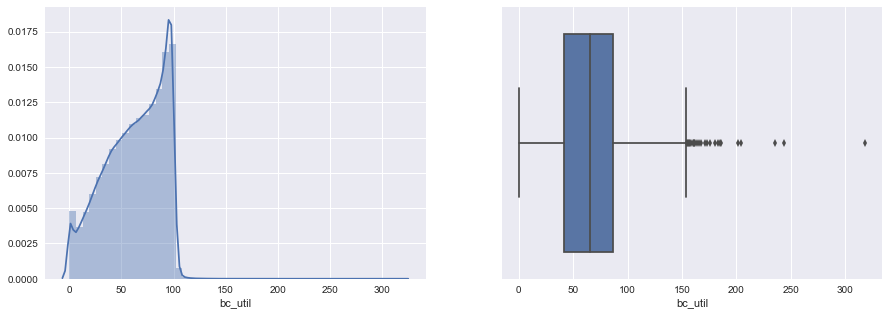

In [79]:
make_plots('bc_util')

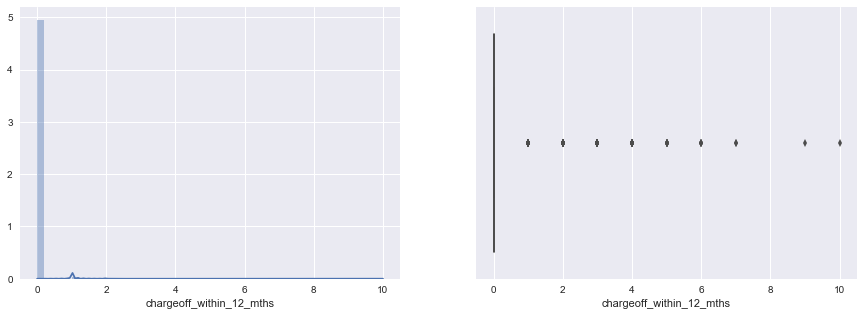

In [80]:
make_plots('chargeoff_within_12_mths')

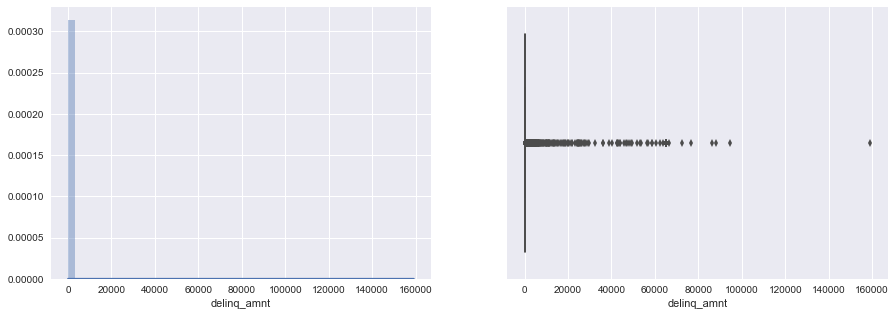

In [81]:
make_plots('delinq_amnt')

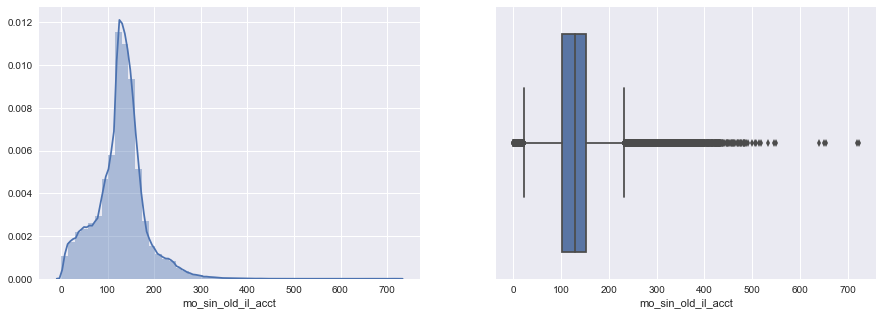

In [82]:
make_plots('mo_sin_old_il_acct')

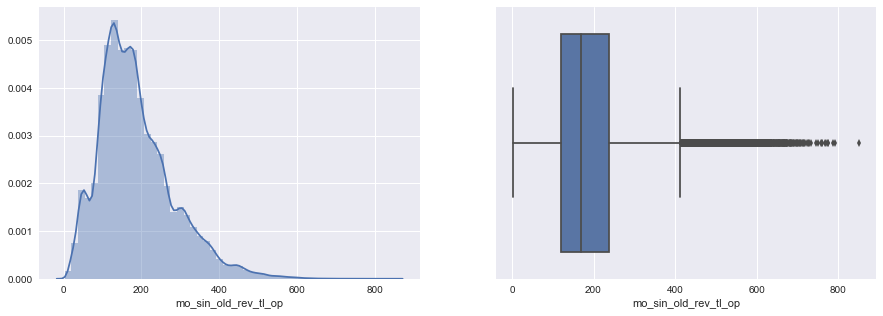

In [83]:
make_plots('mo_sin_old_rev_tl_op')

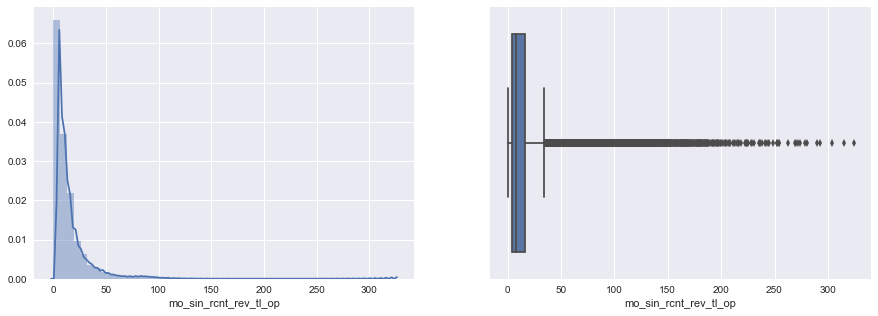

In [84]:
make_plots('mo_sin_rcnt_rev_tl_op')

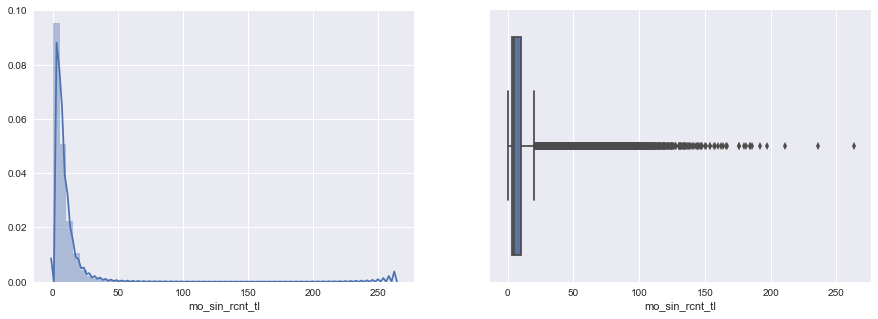

In [85]:
make_plots('mo_sin_rcnt_tl')

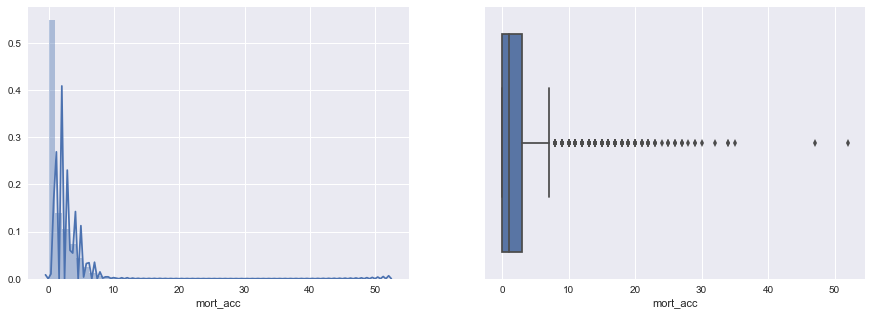

In [86]:
make_plots('mort_acc')

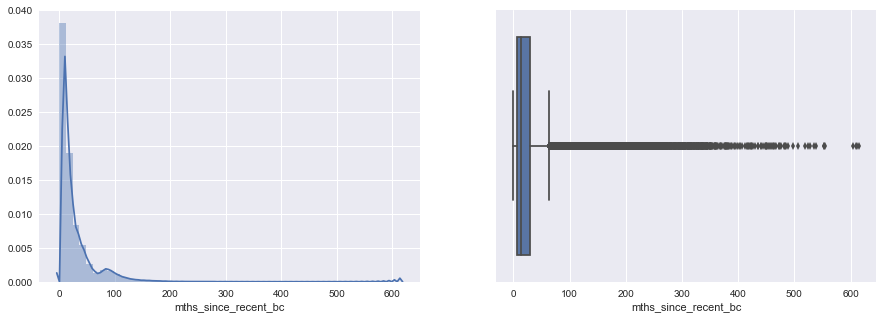

In [87]:
make_plots('mths_since_recent_bc')

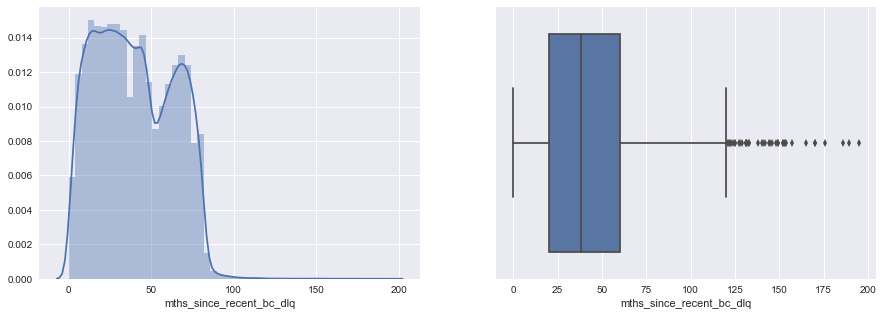

In [88]:
make_plots('mths_since_recent_bc_dlq')

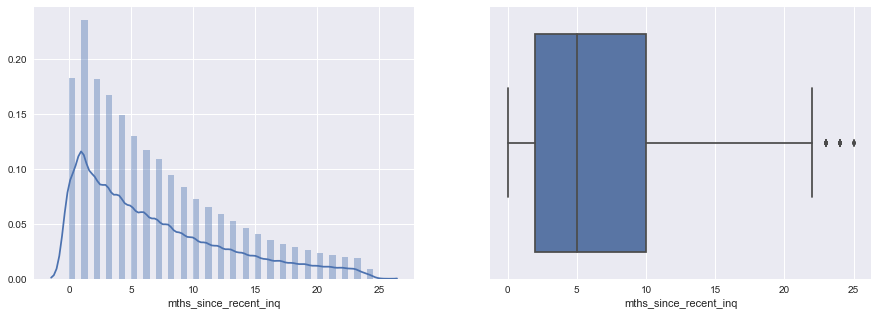

In [89]:
make_plots('mths_since_recent_inq')

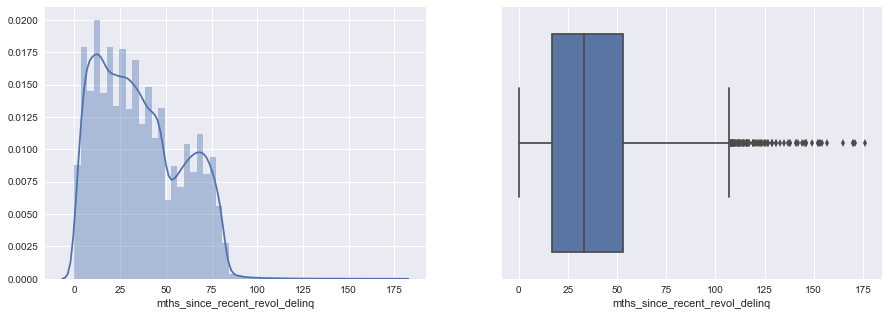

In [90]:
make_plots('mths_since_recent_revol_delinq')

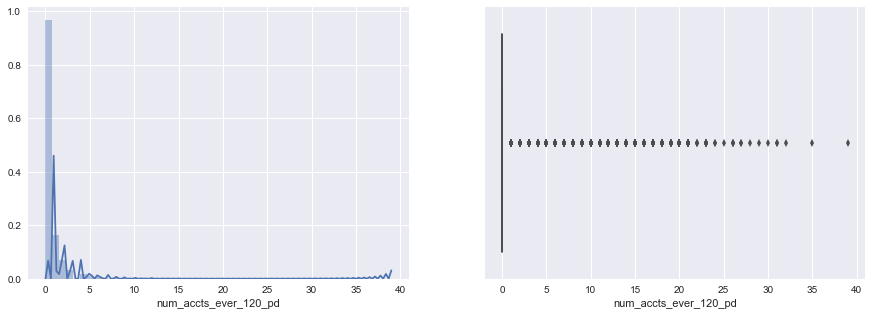

In [91]:
make_plots('num_accts_ever_120_pd')

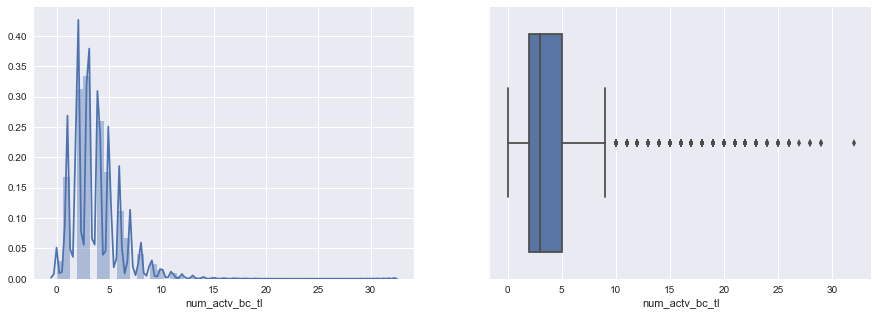

In [92]:
make_plots('num_actv_bc_tl')

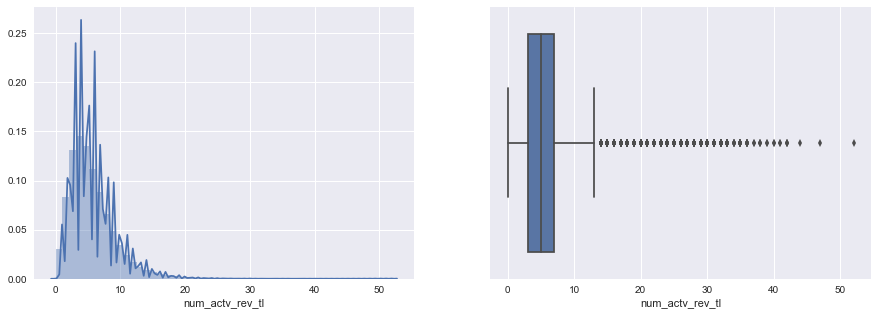

In [93]:
make_plots('num_actv_rev_tl')

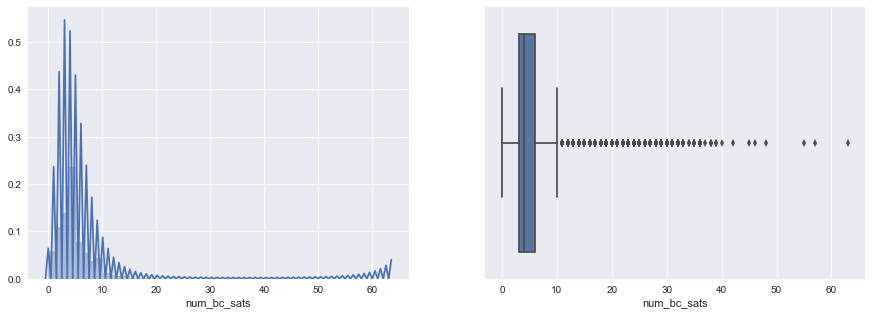

In [94]:
make_plots('num_bc_sats')

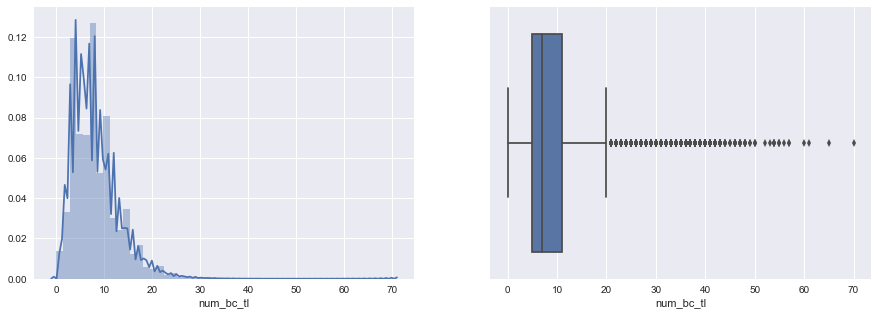

In [95]:
make_plots('num_bc_tl')

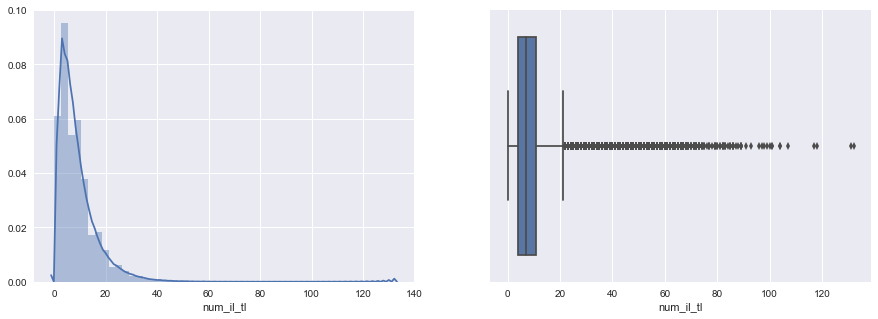

In [96]:
make_plots('num_il_tl')

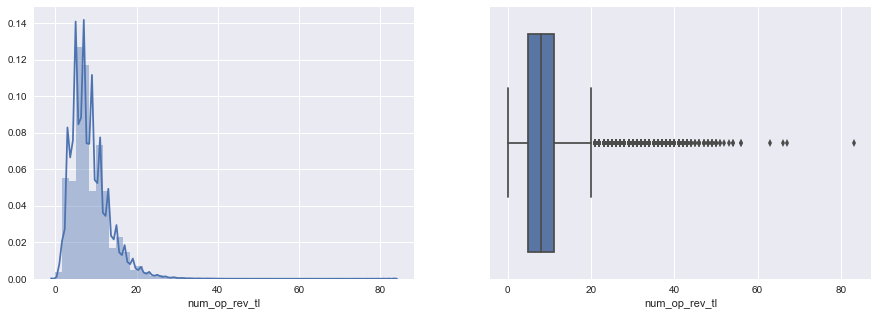

In [97]:
make_plots('num_op_rev_tl')

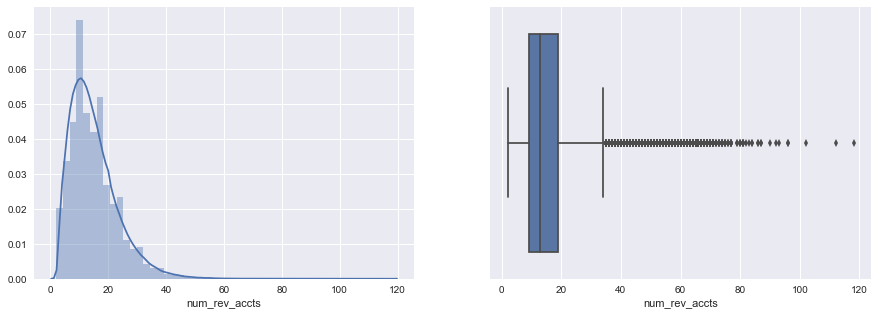

In [98]:
make_plots('num_rev_accts')

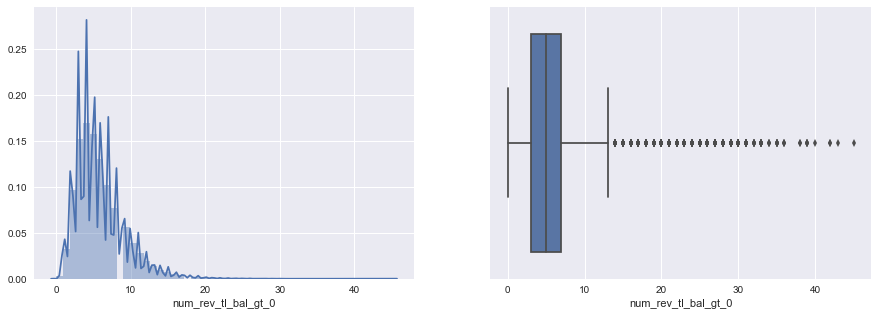

In [99]:
make_plots('num_rev_tl_bal_gt_0')

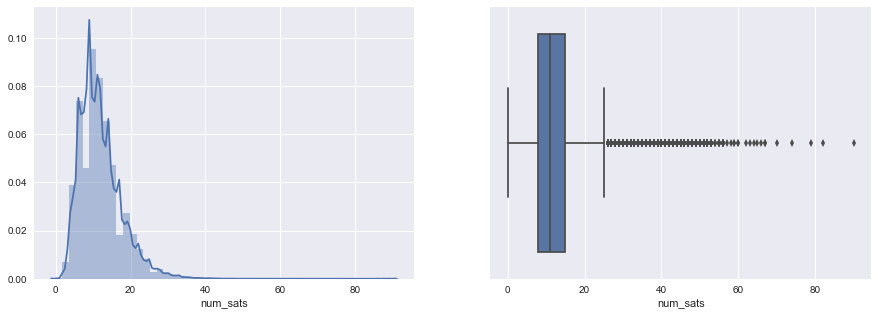

In [100]:
make_plots('num_sats')

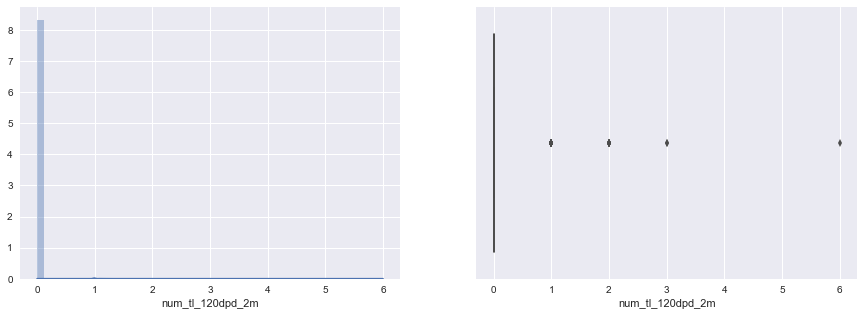

In [101]:
make_plots('num_tl_120dpd_2m')

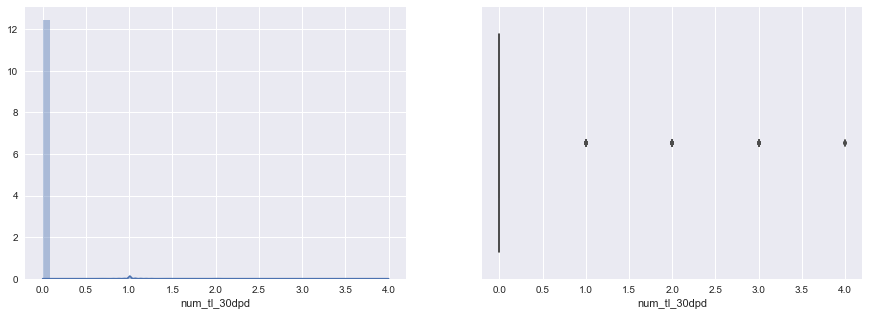

In [102]:
make_plots('num_tl_30dpd')

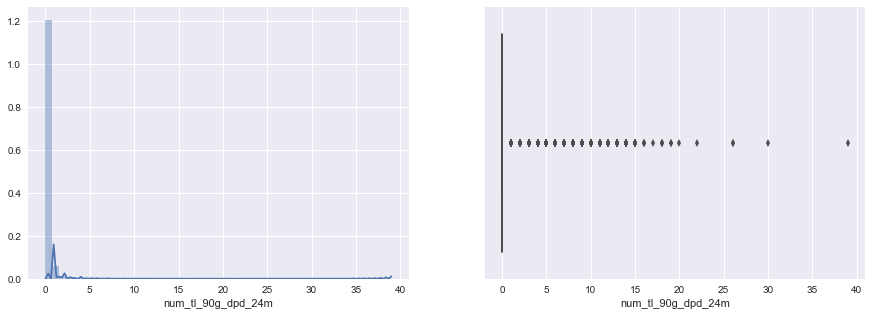

In [103]:
make_plots('num_tl_90g_dpd_24m')

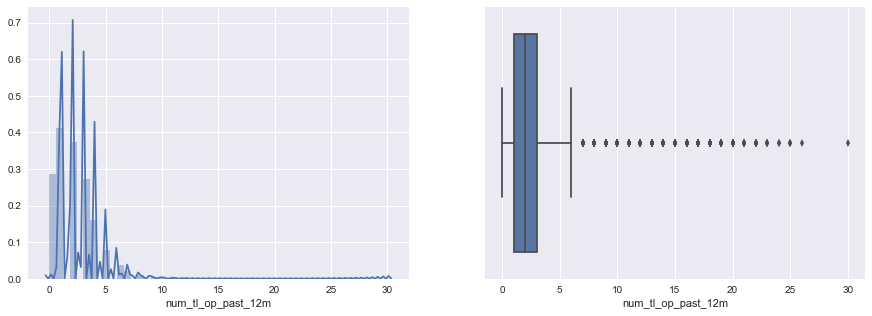

In [104]:
make_plots('num_tl_op_past_12m')

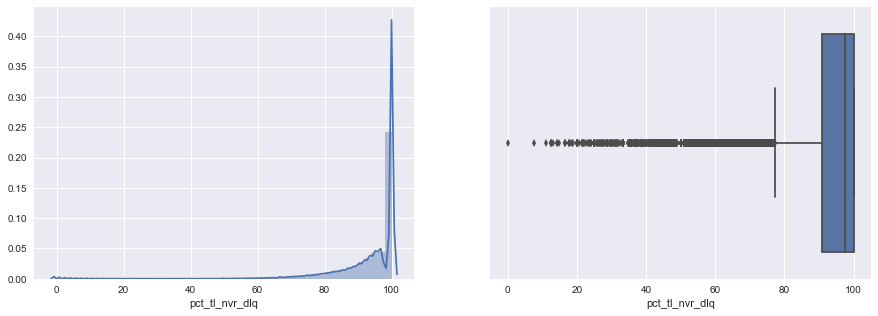

In [105]:
make_plots('pct_tl_nvr_dlq')

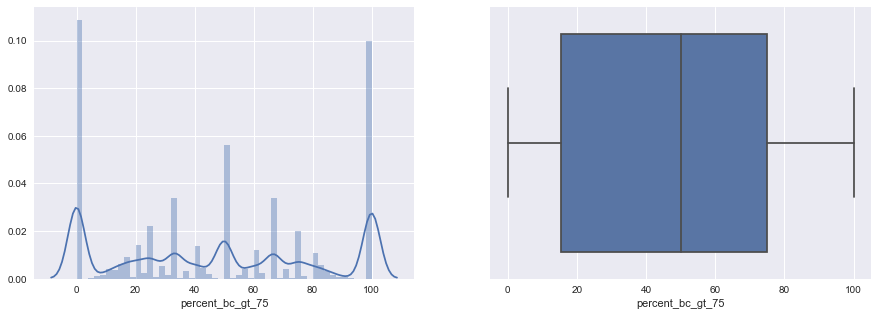

In [106]:
make_plots('percent_bc_gt_75')

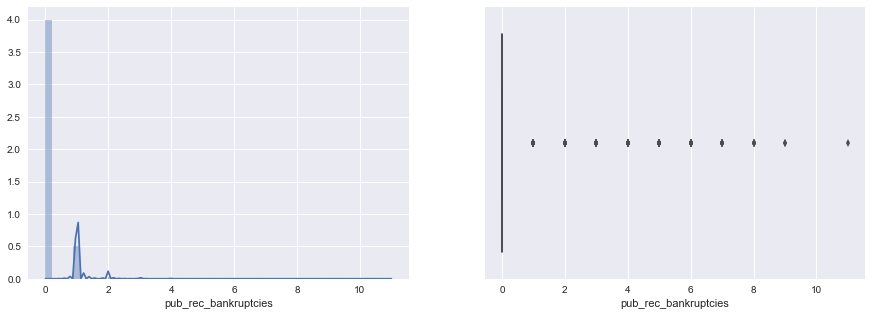

In [107]:
make_plots('pub_rec_bankruptcies')

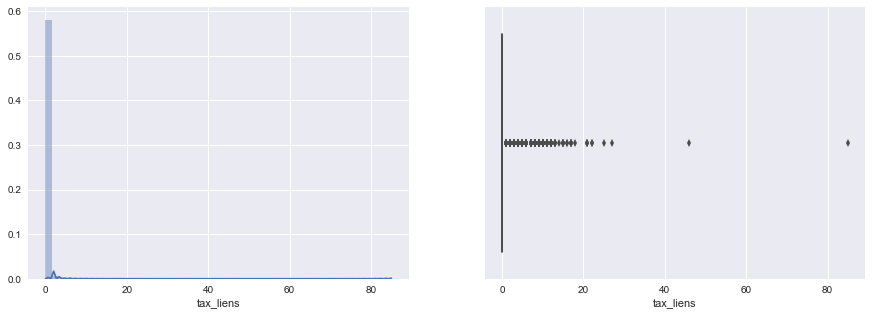

In [108]:
make_plots('tax_liens')

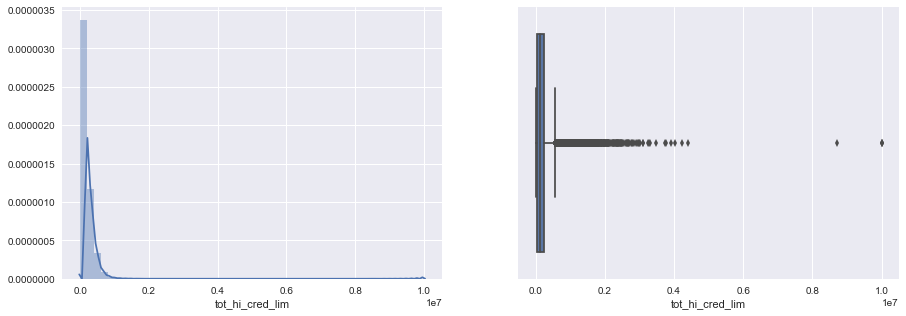

In [109]:
make_plots('tot_hi_cred_lim')

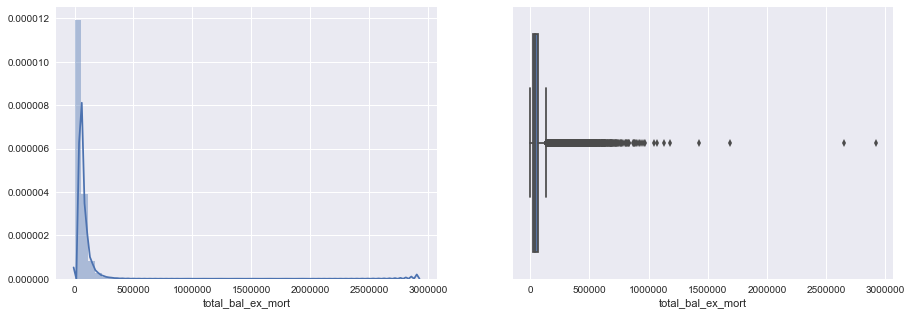

In [110]:
make_plots('total_bal_ex_mort')

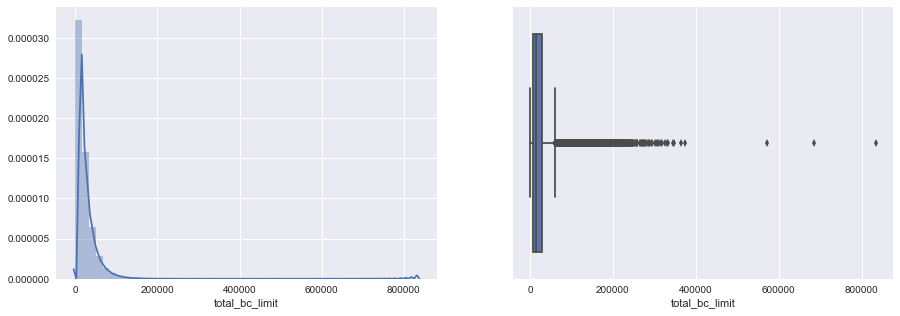

In [111]:
make_plots('total_bc_limit')

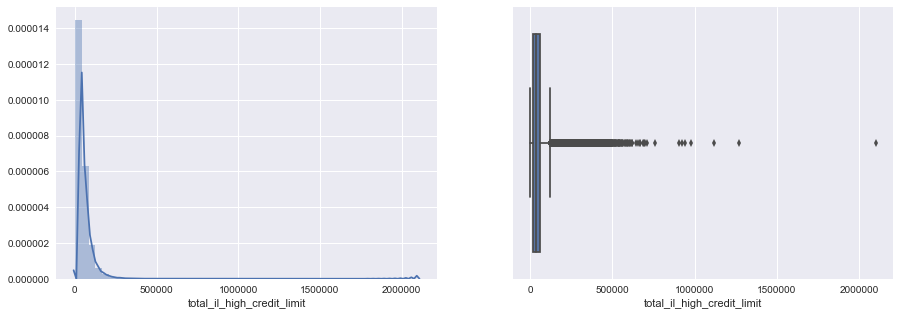

In [112]:
make_plots('total_il_high_credit_limit')

In [116]:
missing_vals = df.apply(lambda x: (sum(x.isnull().values), sum(x.isnull().values)/ len(df)), axis = 0) # For columns

In [125]:
missing_vals.sort_values(ascending=False)[:36]

dti_joint                         (420586, 0.998791246631)
verification_status_joint         (420584, 0.998786497109)
annual_inc_joint                  (420584, 0.998786497109)
il_util                           (402478, 0.955789073724)
mths_since_rcnt_il                (400285, 0.950581222764)
max_bal_bc                         (399723, 0.94924660706)
open_il_24m                        (399723, 0.94924660706)
all_util                           (399723, 0.94924660706)
open_il_12m                        (399723, 0.94924660706)
open_rv_12m                        (399723, 0.94924660706)
open_acc_6m                        (399723, 0.94924660706)
total_bal_il                       (399723, 0.94924660706)
open_rv_24m                        (399723, 0.94924660706)
open_il_6m                         (399723, 0.94924660706)
inq_last_12m                       (399723, 0.94924660706)
total_cu_tl                        (399723, 0.94924660706)
inq_fi                             (399723, 0.9492466070